In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import numpy as np

In [2]:
data=pd.read_csv("Deepak.csv")

In [3]:
data=data.drop(0,axis=0).astype(float)

In [4]:
data.columns

Index(['depth of borewell', 'Calculated depth', 'Avg time'], dtype='object')

### Analysis of Calculated Depth

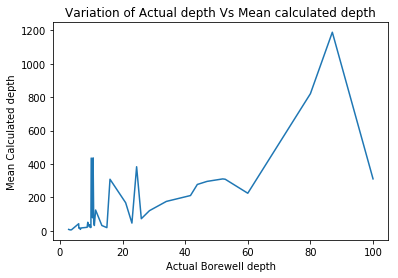

In [106]:
actual_Depth=data['depth of borewell'].unique()
g=data.groupby(["depth of borewell"])
g['Calculated depth'].median()
plt.plot(g['Calculated depth'].median())
plt.xlabel('Actual Borewell depth')
plt.ylabel('Mean Calculated depth')
plt.title('Variation of Actual depth Vs Mean calculated depth')
plt.show()

In [6]:
list(g)

[(2.8,    depth of borewell  Calculated depth  Avg time
  1                2.8           9.33156      1.38
  2                2.8           8.93025      1.35
  3                2.8           8.93025      1.35),
 (3.3,     depth of borewell  Calculated depth  Avg time
  19                3.3              5.96      1.12
  20                3.3              5.96      1.11
  21                3.3              5.96      1.08),
 (3.7,    depth of borewell  Calculated depth  Avg time
  4                3.7           8.02816      1.28
  5                3.7           6.72329      1.61
  6                3.7           6.09560      1.40),
 (6.0,     depth of borewell  Calculated depth  Avg time
  31                6.0             48.62      3.59
  32                6.0             48.62      2.71
  33                6.0             48.62      3.17
  54                6.0             37.32      3.02
  55                6.0             37.32      2.68
  56                6.0             37.32     

In [96]:
Calc_depth=g['Calculated depth'].median()

In [97]:
z=np.polyfit(np.sort(data.iloc[:,0].unique()),Calc_depth,3)

In [98]:
p=np.poly1d(z)
p

poly1d([-2.78867222e-03,  4.11168155e-01, -8.05845598e+00,  1.06945373e+02])

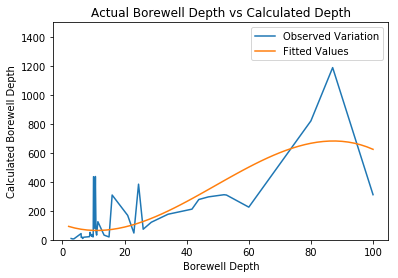

In [99]:
xp=np.linspace(2,100)
plt.plot(np.sort(data.iloc[:,0].unique()),Calc_depth,xp,p(xp))

plt.xlabel('Borewell Depth')
plt.ylabel('Calculated Borewell Depth')
plt.title('Actual Borewell Depth vs Calculated Depth')
plt.ylim(0,1500)
plt.legend(['Observed Variation','Fitted Values'],loc='upper right')
plt.show()
# plt.ylim(2.8,100)

### Analysis of Time

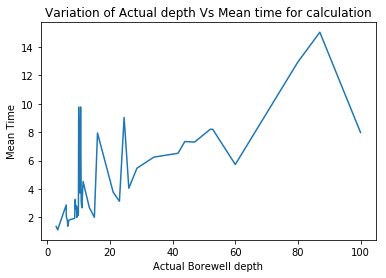

In [100]:
g=data.groupby(["depth of borewell"])
g['Avg time'].median().plot(kind='line')
plt.xlabel('Actual Borewell depth')
plt.ylabel('Mean Time')
plt.title('Variation of Actual depth Vs Mean time for calculation')
plt.show()

In [12]:
h=g['Avg time'].median()
z=np.polyfit(np.sort(data.iloc[:,0].unique()),h,3)
p=np.poly1d(z)

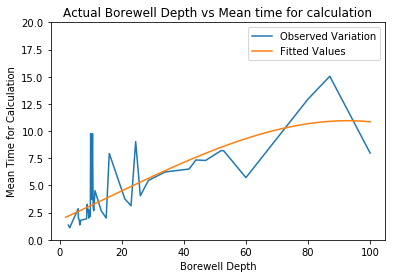

In [13]:
xp=np.linspace(2,100)
plt.plot(np.sort(data.iloc[:,0].unique()),h,xp,p(xp))

plt.xlabel('Borewell Depth')
plt.ylabel('Mean Time for Calculation')
plt.title('Actual Borewell Depth vs Mean time for calculation')
plt.legend(['Observed Variation','Fitted Values'],loc='upper right')
plt.ylim(0,20)
plt.show()

In [102]:
Calc_depth

depth of borewell
2.80         8.93025
3.30         5.96000
3.70         6.72329
6.00        42.97000
6.05        16.23000
6.40        17.87000
6.50         9.19681
6.85        17.82000
8.70        21.60900
8.90        51.75000
9.00        34.41000
9.30        36.78000
9.40        24.10000
9.50        35.74000
9.60        35.85500
9.70        32.92000
9.80        20.09500
9.90        21.00000
10.00      435.65000
10.40       78.79000
10.60      436.65000
10.80       55.17000
11.00       32.36000
11.40      124.96000
13.40       32.36000
15.00       19.60000
16.00      308.91000
21.00      168.39000
23.00       46.78000
24.50      383.73000
26.00       73.00800
28.60      121.03000
34.00      176.40000
41.70      211.50000
43.89      277.83000
47.00      296.11000
52.00      310.91000
52.80      308.91000
60.00      225.30000
80.00      820.47000
87.00     1187.88000
100.00     311.25000
Name: Calculated depth, dtype: float64

### Variation with time

In [83]:
file=pd.read_excel("Deepak.xlsx",sheet_name='Sheet3')


In [58]:
tmp_df=data.sort_values(by=['Avg time']).reset_index(drop=True)
tmp_df['Delta D']=tmp_df.iloc[:,0]-tmp_df.iloc[:,1]
tmp_df['Percentage Variation']=tmp_df['Delta D']*100/tmp_df['Calculated depth']

## Fit a regression Model to Actual and Calculated Depth

In [61]:
from sklearn import linear_model 

In [82]:
n=pd.DataFrame(np.arange(1,len(tmp_df['depth of borewell'])+1))
LM=linear_model.LinearRegression()
LM.fit(n,tmp_df['depth of borewell'])
y_pred1 = LM.predict(n)
#plt.plot(pd.DataFrame(np.arange(1,len(tmp_df['depth of borewell'])+1)),y_pred)
#plt.show()

LM2=linear_model.LinearRegression()
LM2.fit(n,tmp_df['Calculated depth'])
y_pred2 = LM2.predict(n)


In [167]:
n=pd.DataFrame(np.arange(1,len(Calc_depth)+1))
LM=linear_model.Ridge(alpha=3500)
LM.fit(n,Calc_depth)
y_pred1 = LM.predict(n)
#plt.plot(pd.DataFrame(np.arange(1,len(tmp_df['depth of borewell'])+1)),y_pred)
#plt.show()

LM2=linear_model.LinearRegression()
LM2.fit(n,actual_Depth)
y_pred2 = LM2.predict(n)
delD=f-h

In [168]:
y_pred1

array([  6.79611681,  14.45984555,  22.12357429,  29.78730303,
        37.45103177,  45.11476051,  52.77848925,  60.44221798,
        68.10594672,  75.76967546,  83.4334042 ,  91.09713294,
        98.76086168, 106.42459041, 114.08831915, 121.75204789,
       129.41577663, 137.07950537, 144.74323411, 152.40696284,
       160.07069158, 167.73442032, 175.39814906, 183.0618778 ,
       190.72560654, 198.38933528, 206.05306401, 213.71679275,
       221.38052149, 229.04425023, 236.70797897, 244.37170771,
       252.03543644, 259.69916518, 267.36289392, 275.02662266,
       282.6903514 , 290.35408014, 298.01780887, 305.68153761,
       313.34526635, 321.00899509])

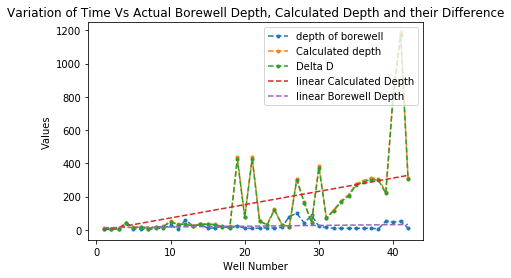

In [164]:
plt.plot(n,actual_Depth,'--.',n,Calc_depth,'.--',n,delD,'.--',n,y_pred1,'--',n,y_pred2,'--')
# plt.plot(tmp_df['Avg time'],tmp_df['depth of borewell'],'.')
plt.xlabel('Well Number')
plt.ylabel('Values')
plt.title('Variation of Time Vs Actual Borewell Depth, Calculated Depth and their Difference')
plt.legend(['depth of borewell','Calculated depth','Delta D','linear Calculated Depth','linear Borewell Depth'],loc='upper right')
plt.show()

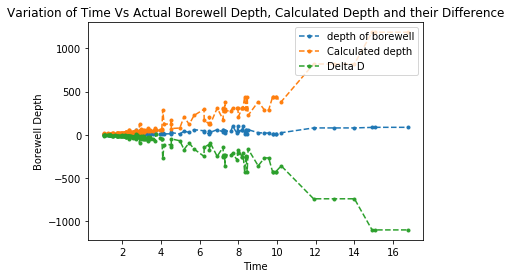

In [113]:
plt.plot(tmp_df['Avg time'],tmp_df['depth of borewell'],'--.',tmp_df['Avg time'],tmp_df['Calculated depth'],'.--',tmp_df['Avg time'],tmp_df['Delta D'],'.--',)
# plt.plot(tmp_df['Avg time'],tmp_df['depth of borewell'],'.')
plt.xlabel('Time')
plt.ylabel('Borewell Depth')
plt.title('Variation of Time Vs Actual Borewell Depth, Calculated Depth and their Difference')
plt.legend(['depth of borewell','Calculated depth','Delta D'],loc='upper right')
plt.show()